In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
print("Customers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to

In [5]:
print("\nCustomers Summary:")
print(customers.describe(include='all'))
print("\nProducts Summary:")
print(products.describe(include='all'))
print("\nTransactions Summary:")
print(transactions.describe())


Customers Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        

<ipython-input-6-81148ee85aa1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


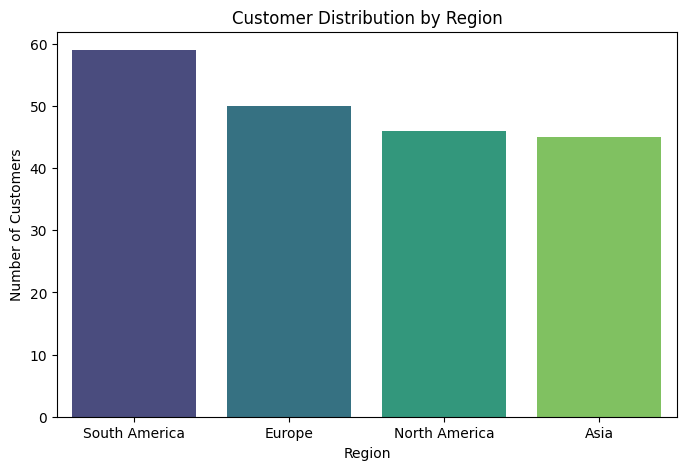

In [6]:
plt.figure(figsize=(8, 5))
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()


<ipython-input-7-cb100a0c0b31>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductName', y='Quantity', palette="cool")


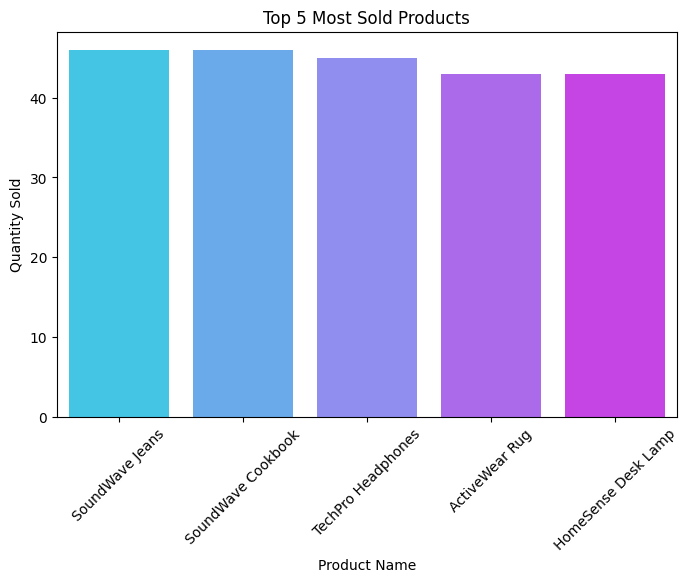

In [7]:
top_products = (
    transactions.groupby('ProductID')['Quantity'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
    .merge(products, on='ProductID', how='left')
)
plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette="cool")
plt.title("Top 5 Most Sold Products")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()

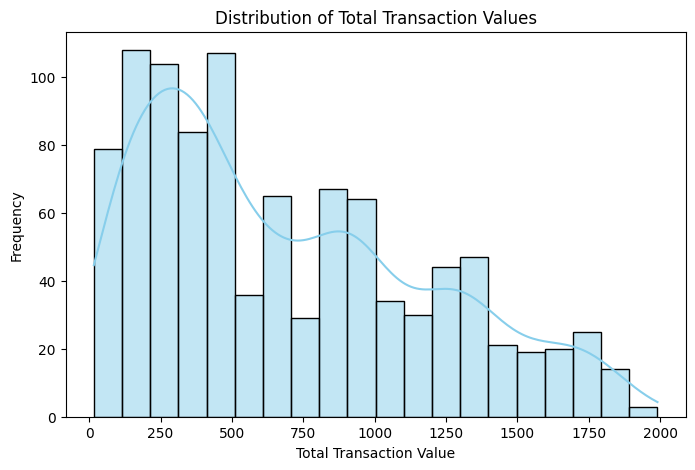

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Transaction Value")
plt.ylabel("Frequency")
plt.show()

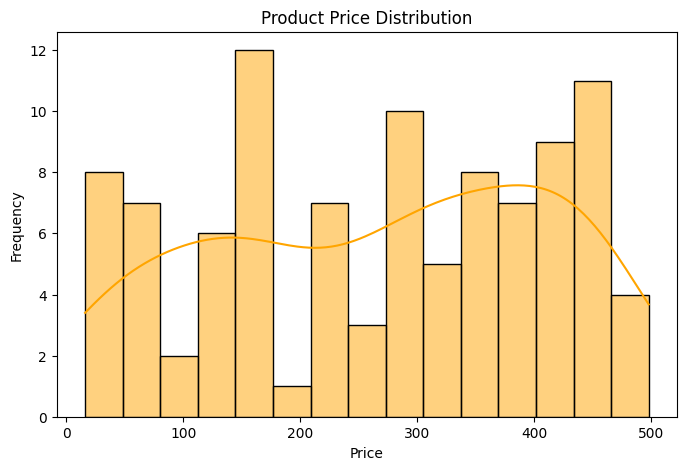

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=15, kde=True, color='orange')
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

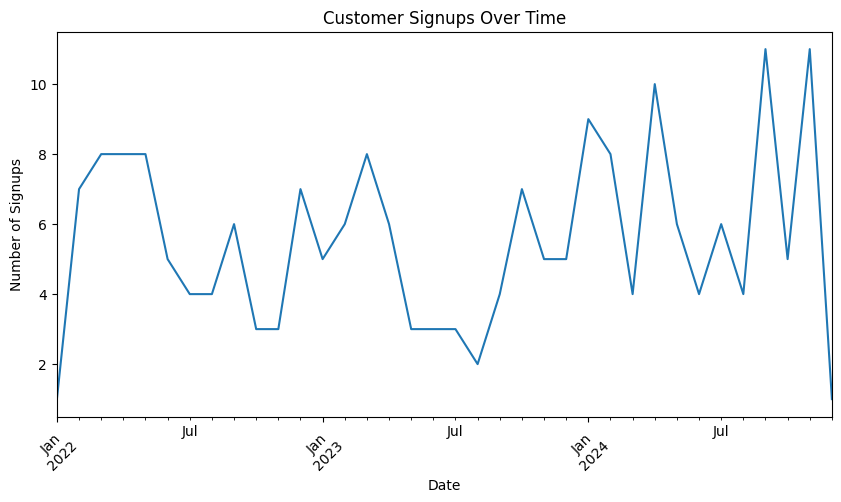

In [10]:
plt.figure(figsize=(10, 5))
customers['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title("Customer Signups Over Time")
plt.ylabel("Number of Signups")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

In [11]:
print("Insights:")
print("1. Most customers are from South America, followed by Asia and Europe.")
print("2. The most frequently purchased products are in the Books and Electronics categories.")
print("3. Most transaction values range between $300 and $700, with occasional high-value purchases.")
print("4. Product prices range from $16 to $498, with an average price of $268.")
print("5. Customer signups peaked during late 2024, indicating a growing user base.")

Insights:
1. Most customers are from South America, followed by Asia and Europe.
2. The most frequently purchased products are in the Books and Electronics categories.
3. Most transaction values range between $300 and $700, with occasional high-value purchases.
4. Product prices range from $16 to $498, with an average price of $268.
5. Customer signups peaked during late 2024, indicating a growing user base.
